# HW 4: Unsupervised Learning, K-Means Clustering
### CS 4824 / ECE 4484, Spring '21

Code inspired by submissions to the [Credit Card Dataset for Clustering](https://www.kaggle.com/arjunbhasin2013/ccdata) Kaggle competition.

---

In this assignment, you're tasked with...
1. Implementing the K-Means clustering algorithm in `custom_kmeans.py`.
2. Choosing the best value of $K$ for this dataset
3. Interpreting the demographhics within each of your $K$ clusters

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
###### standard imports ######
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

###### special from sklearn ######
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [9]:
###### Import our data and check out its dimensions ######
data = pd.read_csv("creditcards.csv")
print(f"{data.shape[0]} rows, {data.shape[1]} columns")

8950 rows, 17 columns


In [10]:
###### Check out the dataset ######
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## 1. Test and time your solution!

Here is where you run your solution to see how well it performs. Toggle the comments below to see the results from scikit-learn's KMeans implementation, they should help give you a reference for how your algorithm should perform.

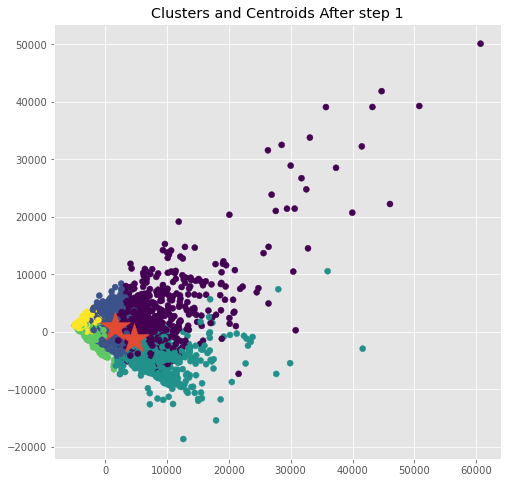

Clustered 8950 datapoints into 5 clusters in 40.8190 seconds


In [16]:
import time
###### Import and run your solution! ######
from custom_kmeans import CustomKMeans

K = 5
tic = time.perf_counter()

# ===== Toggle the comment below to see sklearn's implementation =====
custom_labels = CustomKMeans(K).fit(data, True) # True is added to turn on by-timestep graphing
# custom_labels = KMeans(K).fit(data)
# ====================================================================

toc = time.perf_counter()

print(f"Clustered {data.shape[0]} datapoints into {K} clusters in {toc - tic:0.4f} seconds")

## 2. Choose the best K!

Use the elbow method to choose the $K$ which best balances the fewest number of clusters and the minimum sum of distances. Again, toggle sk-learn's implementation for your reference.

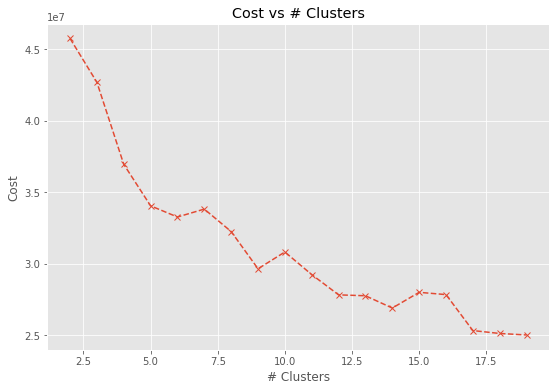

In [18]:
###### For choosing best K ######
sum_of_distances = []
max_k = 20
for k in range(2, max_k):
# ===== Toggle the comment below to see sklearn's implementation =====
    kmean = CustomKMeans(k).fit(data)
    # kmean = KMeans(k).fit(data) 
# ====================================================================
    sum_of_distances.append(kmean.inertia_)

###### Plot the cost vs number of clusters ######
fig = plt.figure(figsize=(9,6))
plt.plot(range(2, max_k), sum_of_distances, '--x')
plt.title("Cost vs # Clusters")
plt.xlabel("# Clusters")
plt.ylabel('Cost')
plt.show()

## 3. Interpret your groups!

Now that you've chosen the best $K$, cluster along that value. Use the seaborn FaceGrids to help interpreting the meanings of each cluster.

In [11]:
best_k = 7
labels = CustomKMeans(best_k).fit(data).labels_

# ================ Uncomment for accuracy reference ================ 
# labels = KMeans(best_k).fit(data).labels_
# ==================================================================

pd.DataFrame(labels).to_csv('labels.csv', index=False) # Saves to local file for plot_3d.py

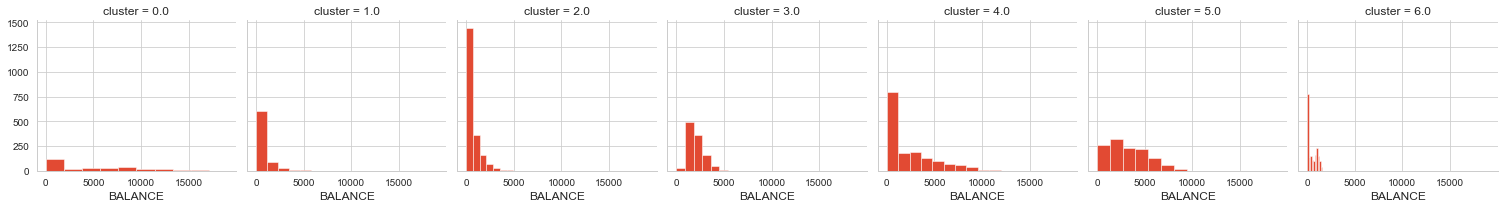

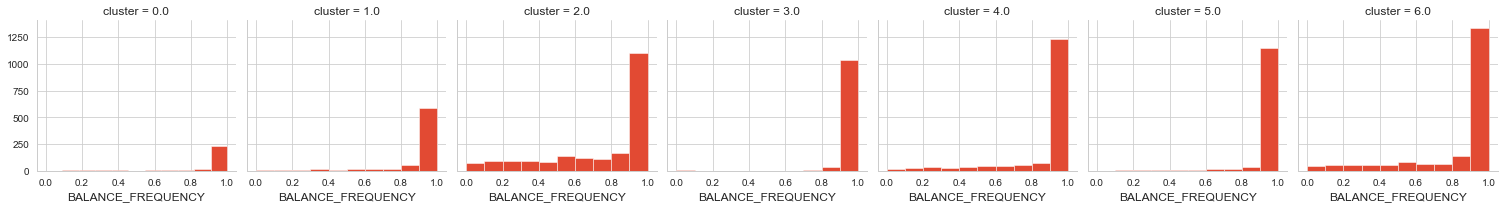

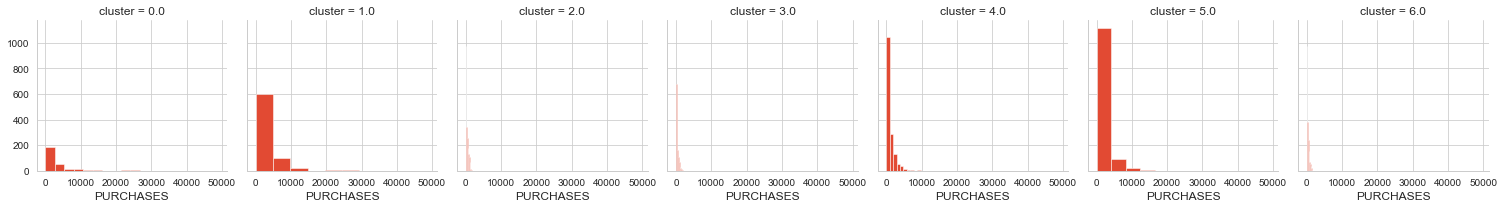

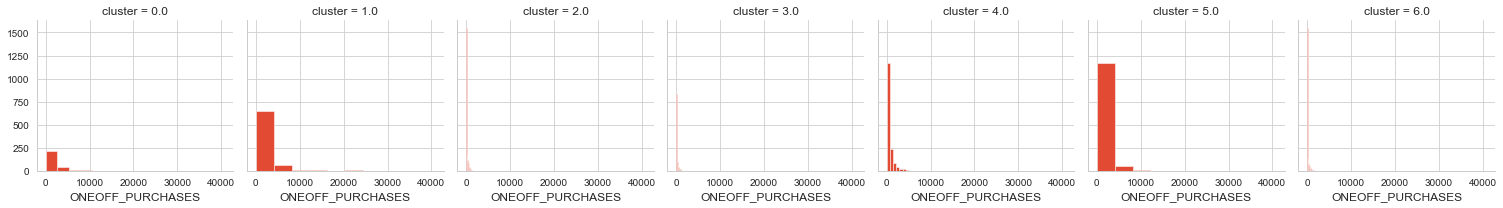

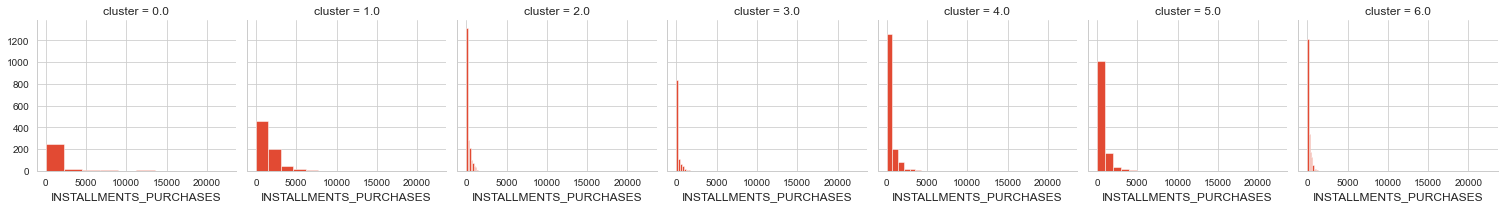

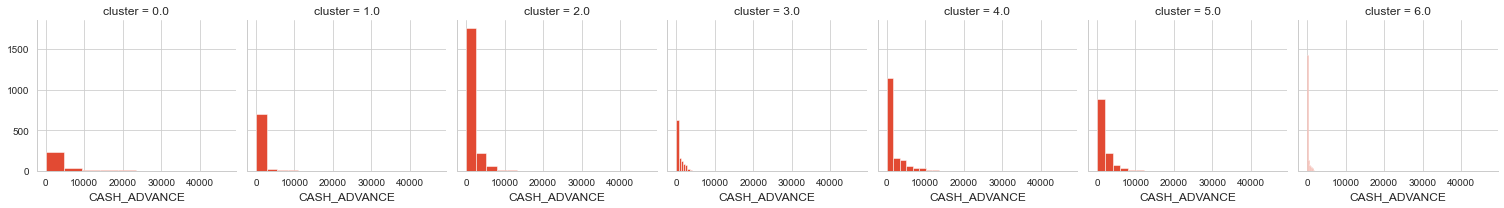

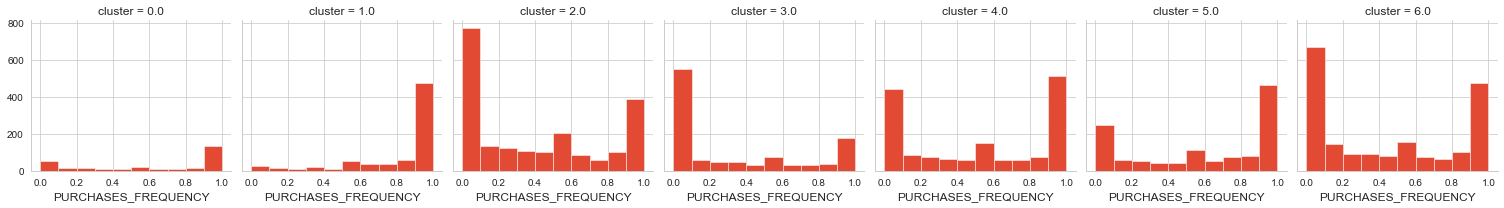

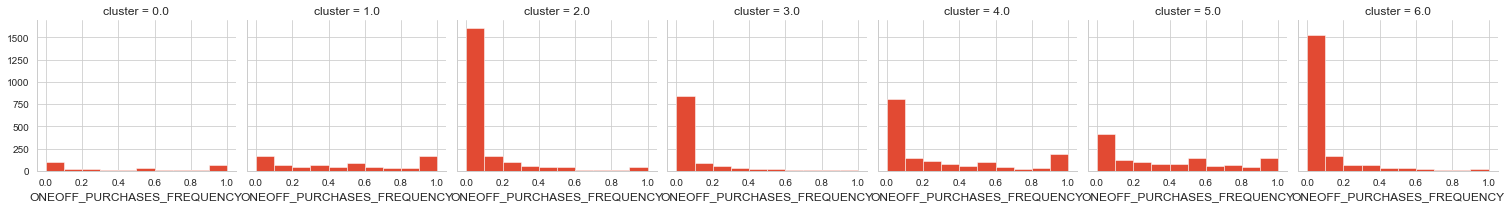

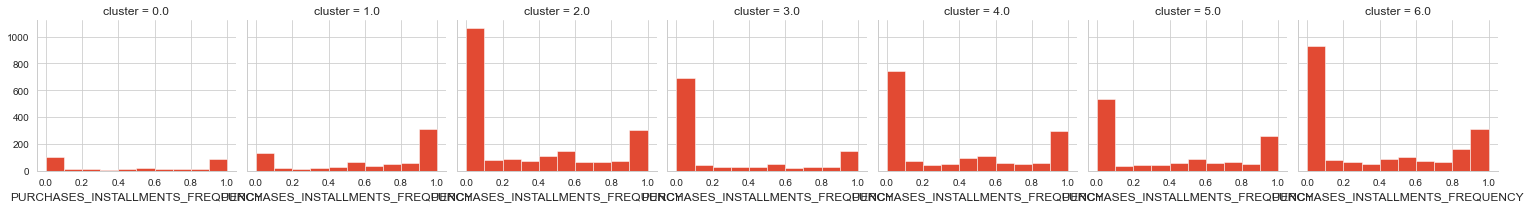

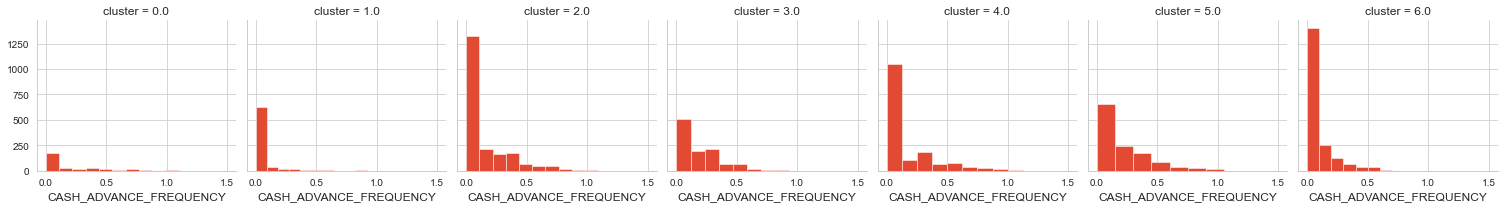

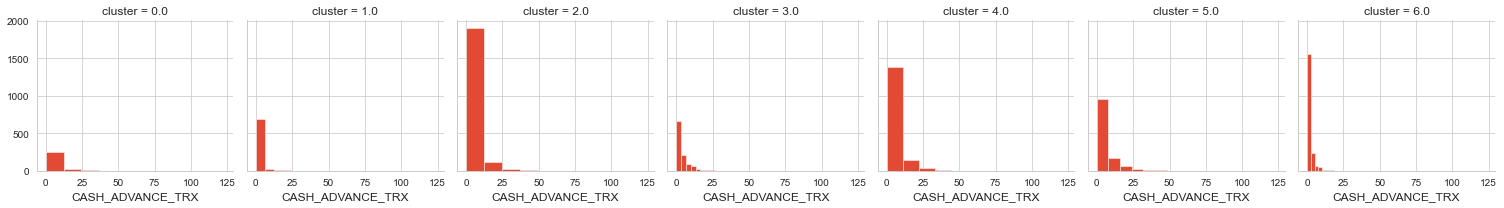

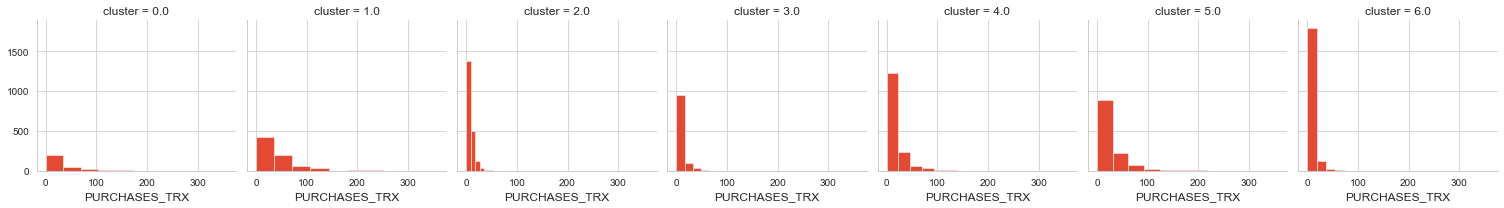

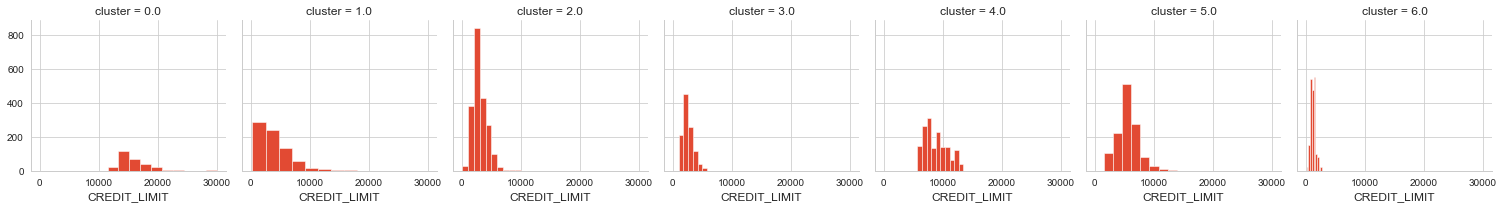

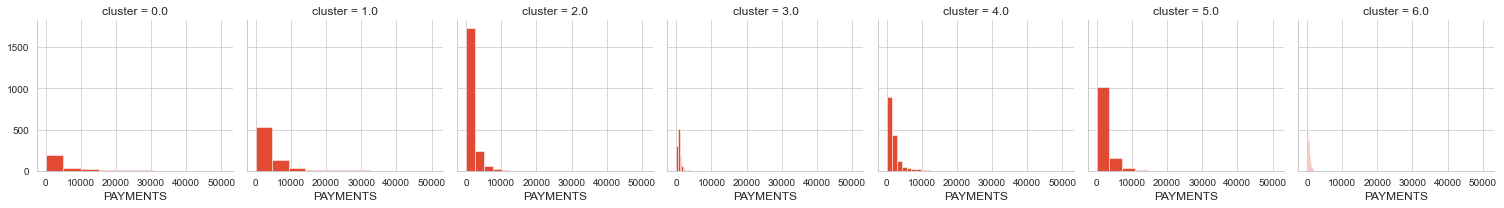

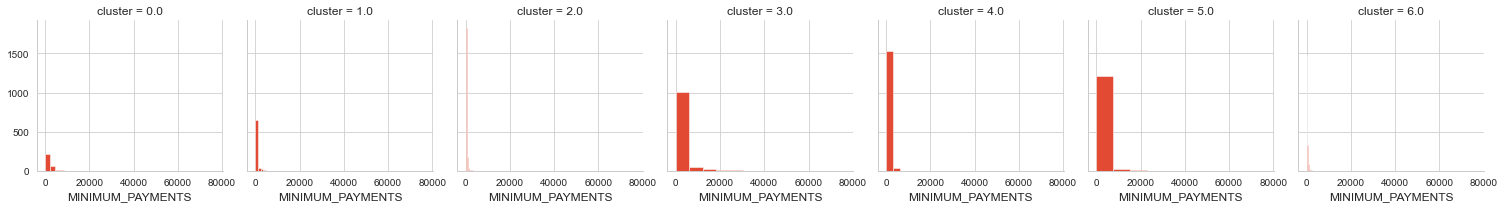

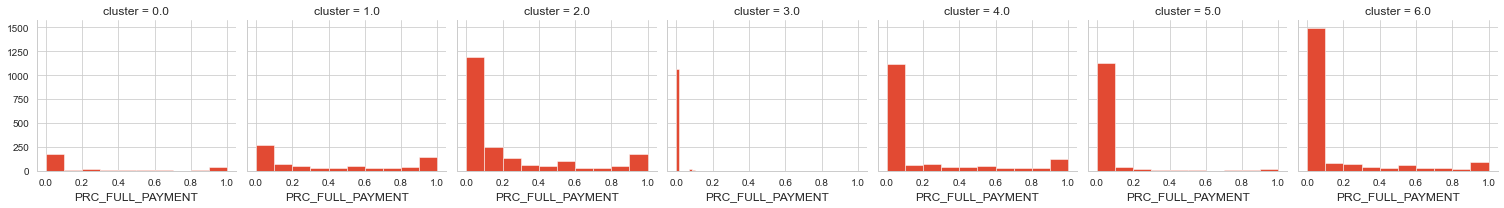

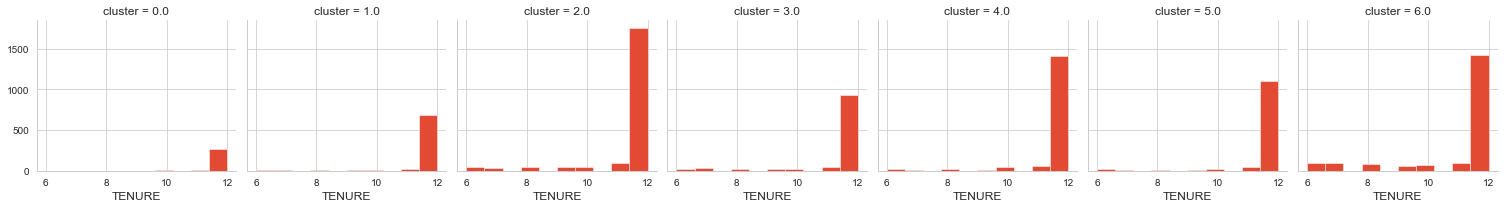

In [12]:
###### Generate by-cluster feature breakdowns to aid in interpretation ######
labeled_data = data.copy()
labeled_data['cluster'] = labels

for c in labeled_data:
    if c == 'cluster': continue
    grid=sns.FacetGrid(labeled_data, col='cluster')
    grid.map(plt.hist, c)

## Replace cluster labels

Now that you've seen the feature breakdowns, describe and explain each cluster below. 2-3 sentences should be sufficient.

1. **Foo**: ...
2. **Bar**: ...
3. ...

Now replace the dummy strings in the below dict "`interpretations`" with each of your cluster names.

In [13]:
######  extract top two principal components ######
data_pca = pd.DataFrame(PCA(2).fit_transform(data))
data_pca.columns = ['PC1', 'PC2']
data_pca['cluster'] = labels

###### Interpret the meanings of your K clusters ######
interpretations = {
    0: "cluster 1",
    1: "cluster 2",
    2: "cluster 3",
    3: "cluster 4",
    4: "cluster 5",
    5: "cluster 6",
    6: "cluster 7",
#   ...
}
for key, value in interpretations.items():
    data_pca['cluster'].replace(key, value, inplace=True)

### Inspect your clusters!

See the divisions between your clusters, as projected along the first two principal components, below. Some questions you should be asking yourself: 
- do the intersections and overlaps between the groups make sense? 
- are there distinct boundaries between clusters?
- do the outliers' labels make sense?

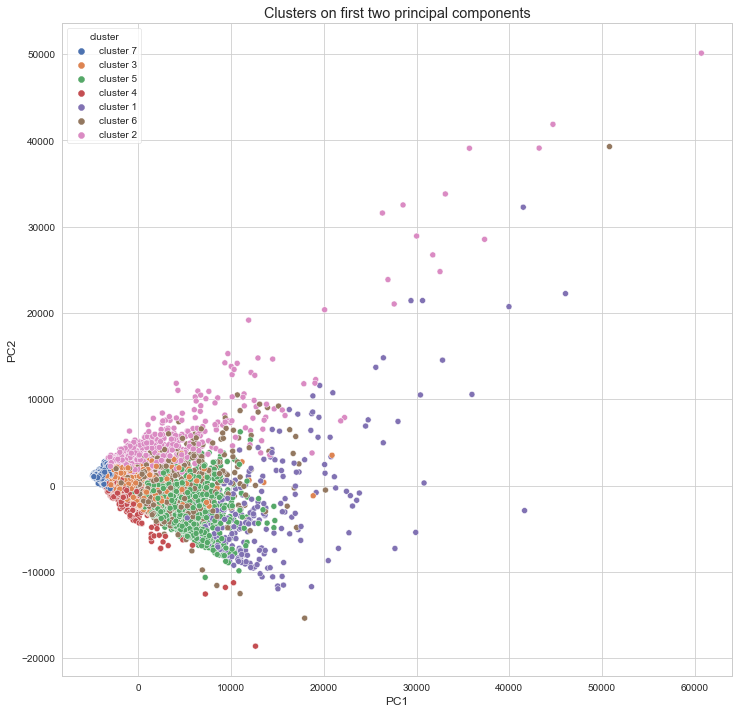

In [14]:
###### graph the data with seaborn ######
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,12))

sns.scatterplot(data=data_pca, x='PC1', y='PC2', hue='cluster', palette='deep')

###### label and display! ######
plt.title("Clusters on first two principal components")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
# Task2:

# The best K according to the Elbow Method should be around 7 because the location 
# of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.
# The custom Kmeans takes a long time to run this K generator. 

In [ ]:
# Task3:

# Each cluster is represented a group of points around a random selected centroid and there are 7 clusters in this case.
# Each color represents one group with unique centroid and labeled with different number of clusters. 
# A cluser refers to a collection of data points aggregated together because of certain similarities.